In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
def p(x,mu,sigma):
    return (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x - mu)**2/(2.*sigma**2))

In [3]:
def g(a, c, x):
    return a + c*x
def h(a, c, x):
    return p(x,0.5,1)/(p(x,0.5,1) + p(x,0.5*c+a,c))
    #return p(x,0.5,1)/(p(x,0.5,1) + abs(c)*p(a+c*x,0.5,1))

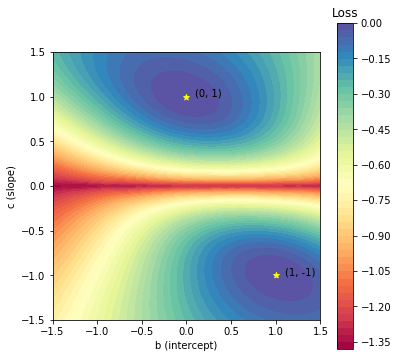

In [11]:
xx = np.random.normal(0.5,1.,10000)
A = 0
C = 0
range = 1.5
alow = A-range
ahigh = A+range
astep = 100
clow = C - range
chigh = C + range
cstep = 100
alpha = 0

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    losses=[]
    for a in np.linspace(alow, ahigh, astep):
        yy = g(a, c, xx)
        losses += [np.mean(-np.log(0.000001+h(a, c, xx)) - np.log(0.000001+1.-h(a, c, yy)))]
    mylosses += [losses]
mylosses = mylosses - np.array(mylosses).max()

x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('b (intercept)')
ax.set_ylabel('c (slope)')
cf = ax.contourf(X,Y,Z,50, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax)
clb.ax.set_title('Loss')
plt.scatter([0, 1], [1, -1], marker='*', c='yellow')
ax.annotate('(0, 1)', xy=(0.1, 1))
ax.annotate('(1, -1)', xy=(1.1, -1))
    
plt.savefig("Z2analytic.pdf")


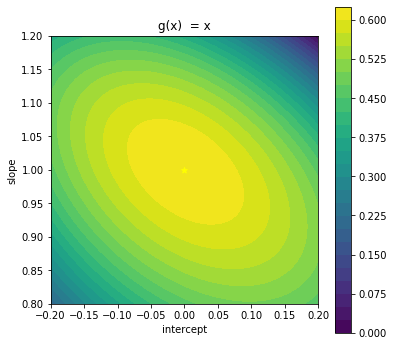

In [25]:
xx = np.random.normal(0.5,1.,10000)
A = 0
C = 1
range = 0.2
alow = A-range
ahigh = A+range
astep = 100
clow = C - range
chigh = C + range
cstep = 100

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    losses=[]
    for a in np.linspace(alow, ahigh, astep):
        yy = g(a, c, xx)
        losses += [np.mean(-np.log(0.000001+h(a, c, xx)) - np.log(0.000001+1.-h(a, c, yy)))]
    mylosses += [losses]
mylosses = mylosses - np.array(mylosses).min() + 10**-5

x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
cf = ax.contourf(X,Y,Z,30)
fig.colorbar(cf, ax=ax)
plt.scatter([0], [1], marker='*', c='yellow')
plt.title('g(x)  = x')


plt.show()

In [ ]:
locator=ticker.LogLocator(),

In [ ]:
np.unravel_index(np.array(mylosses).argmin(), np.array(mylosses).shape)

In [ ]:
np.array(mylosses).min()

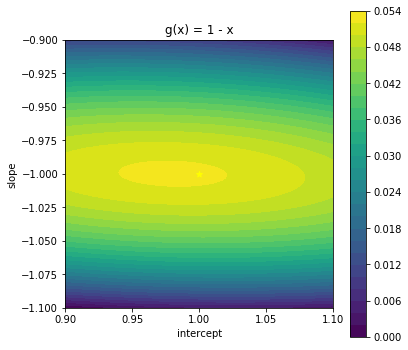

In [9]:
xx = np.random.normal(0.5,1.,10000)
A = 1
C = -1
range = 0.1
alow = A-range
ahigh = A+range
astep = 100
clow = C - range
chigh = C + range
cstep = 100

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    losses=[]
    for a in np.linspace(alow, ahigh, astep):
        yy = g(a, c, xx)
        losses += [np.mean(-np.log(h(a, c, xx)) - np.log(1.-h(a, c, yy))
                          - (g(a, c, yy)-xx)**2
                          )]
    mylosses += [losses]
mylosses = mylosses - np.array(mylosses).min() + 10**-5

x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
cf = ax.contourf(X,Y,Z,30)
fig.colorbar(cf, ax=ax)
plt.scatter([1], [-1], marker='*', c='yellow')
plt.title('g(x) = 1 - x')


plt.show()

In [ ]:
#plt.plot(np.linspace(-3,3,200),p(np.linspace(-3,3,200)))
xx = np.random.normal(0.5,1.,10000)
n1,_,_=plt.hist(xx,density=True,bins=np.linspace(-5,5,100))

yy = g(1, -1, xx)
n2,b,_=plt.hist(yy,density=True,bins=np.linspace(-5,5,100))
#plt.plot(np.linspace(-5,5,50),p(g(-2,-1,np.linspace(-5,5,50))))

In [ ]:
plt.plot(0.5*(b[1:]+b[0:-1]),n1/(n1+n2))
plt.plot(np.linspace(-5,5,20),h(1,-1,np.linspace(-5,5,20)))

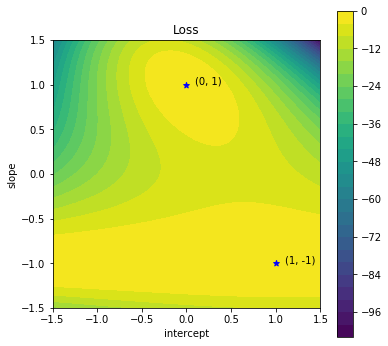

In [31]:
x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
cf = ax.contourf(X,Y,Z,30)
fig.colorbar(cf, ax=ax)
plt.scatter([0, 1], [1, -1], marker='*', c='blue')
plt.title('Loss')
ax.annotate('(0, 1)', xy=(0.1, 1))
ax.annotate('(1, -1)', xy=(1.1, -1))



plt.show()

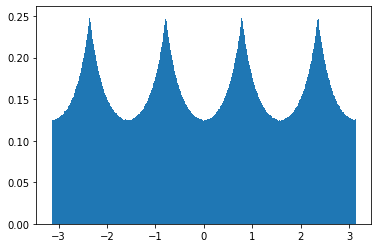

In [2]:
N = 10**8
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)
theta = np.arctan2(y, x)


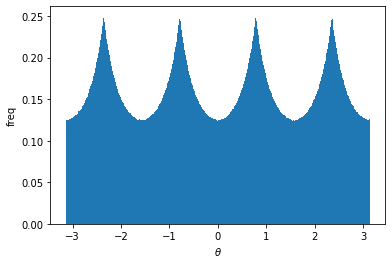

In [4]:
plt.hist(theta,bins=np.linspace(-np.pi, np.pi, 1000),density=True)
plt.xlabel(r"$\theta$")
plt.ylabel("freq")
plt.show()

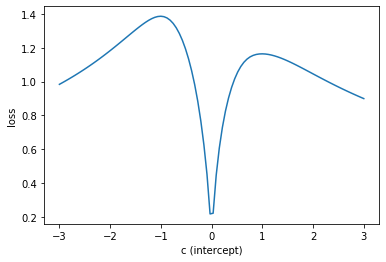

In [12]:
#restricted search space

xx = np.random.normal(0.5,1.,10000)
A = 0
C = 0
range = 3
a = 1
clow = C - range
chigh = C + range
cstep = 100
alpha = 0

losses=[]
for c in np.linspace(clow,chigh,cstep):
    yy = g(a, c, xx)
    losses += [np.mean(-np.log(0.000001+h(a, c, xx)) - np.log(0.000001+1.-h(a, c, yy)))]


plt.plot(np.linspace(clow, chigh, cstep), losses)
plt.xlabel("c (intercept)")
plt.ylabel("loss")
    
plt.savefig("restrictedZ2.pdf")

